In [1]:
from mpl_toolkits.basemap import Basemap
from src.functions.grid import construct_grid,land_reference_subunit
from sklearn.neighbors import KernelDensity
from src.functions.basic_functions import coordinates_change
import pandas as pd

In [2]:
path="C:\\Users\\Denisa.draghia\\Desktop\\Acier\\"
df_gspt=pd.read_csv(path+"data\\clean_data\\steel_factories_dataset_reg.csv")

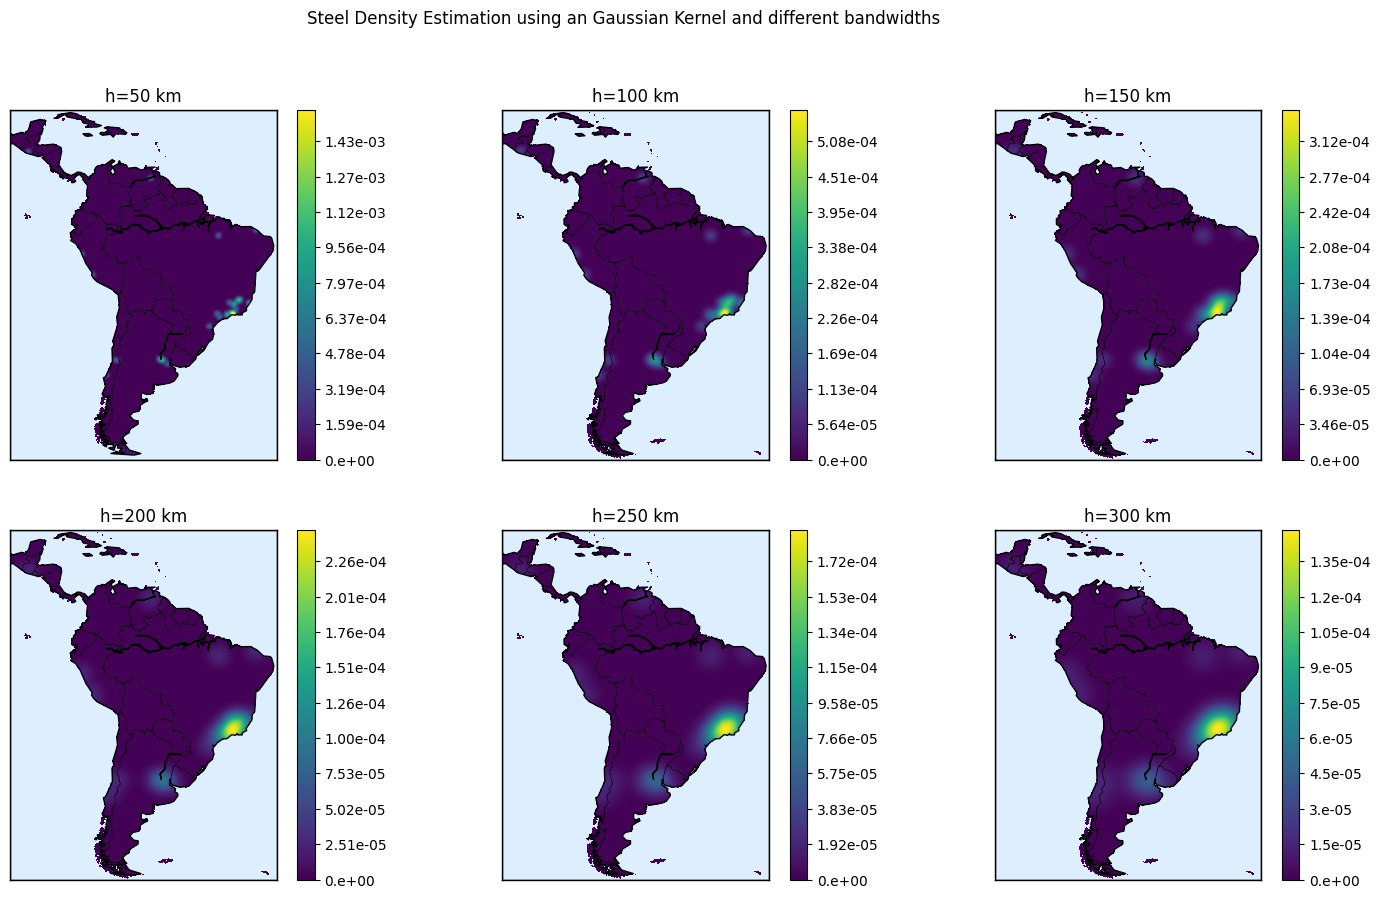

In [25]:
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.pyplot as plt
xgrid,ygrid=construct_grid('Central & South America',0.1)
X, Y = np.meshgrid(xgrid, ygrid)

land_mask = np.load(path+"data\intermediary_data\land_mask\land_mask_Central & South America.npy")
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
k = 0

# Create a list to store colorbars
colorbars = []
h_list=[0.007,0.015, 0.022, 0.029, 0.036, 0.043]
for i in range(2):
    for j in range(3):
        m = Basemap(projection='cyl', ax=axes[i, j], llcrnrlat=Y.min(), urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawmapboundary(fill_color='#DDEEFF')
        m.drawcoastlines()
        m.drawcountries()
        m.fillcontinents(color="#481567FF")

        # Construct a spherical kernel density estimate of the distribution
        kde = KernelDensity(bandwidth=h_list[k], metric='haversine', kernel='gaussian')
        kde.fit(np.radians(coordinates_change(df_gspt[df_gspt["Region"] == 'Central & South America'])))

        # Evaluate only on the land: -9999 indicates ocean
        Z = np.full(land_mask.shape[0], -9999,dtype=np.float64)
        Z[land_mask] = np.exp(kde.score_samples(xy)) 
        divisor=Z[land_mask].sum() # score_samples gives the log
        Z = Z.reshape(X.shape)

        # Plot contours of the density
        levels = np.linspace(0, Z.max(), 100)
        im = axes[i, j].contourf(X, Y, Z, levels=levels, cmap='viridis')
        axes[i, j].set_title(f'h={(k+1)*50} km')
        k += 1

        # Add a colorbar for the current subplot
        cbar = plt.colorbar(im, ax=axes[i, j])
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{np.format_float_scientific(x / divisor,precision=2)}"))
        colorbars.append(cbar)





plt.suptitle("Steel Density Estimation using an Gaussian Kernel and different bandwidths")
plt.show()


In [19]:
a=np.full(2,3,dtype=np.float64)
a[0]=3.999
a

array([3.999, 3.   ])